# Data Exploration

## Understanding our data

#### Import and load

In [90]:
# Libraries
import pandas as pd

In [91]:
# Load dataset
df = pd.read_csv('creditcard.csv')
df_modified = df.copy()

#### Basic info

In [92]:
# Basic info
print(df.shape)
print(df.head(5))
print(df.describe())
print(df.info())
print(df.isnull().sum())
print(df['Class'].value_counts())
print(df.columns)


(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V

#### Duplicates

In [93]:
# Save both observations duplicated of the dataset
df_duplicated = df[df.duplicated(keep=False)]
print(df_duplicated.shape)

df_duplicated.head(4)

(1854, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0


In [94]:
# Inplace will modify the dataframe and not creating another one
def del_duplicated(df):
    df.drop_duplicates(inplace=True)
    return df

In [95]:
df_modified = del_duplicated(df_modified)

#### Visualization of distributions

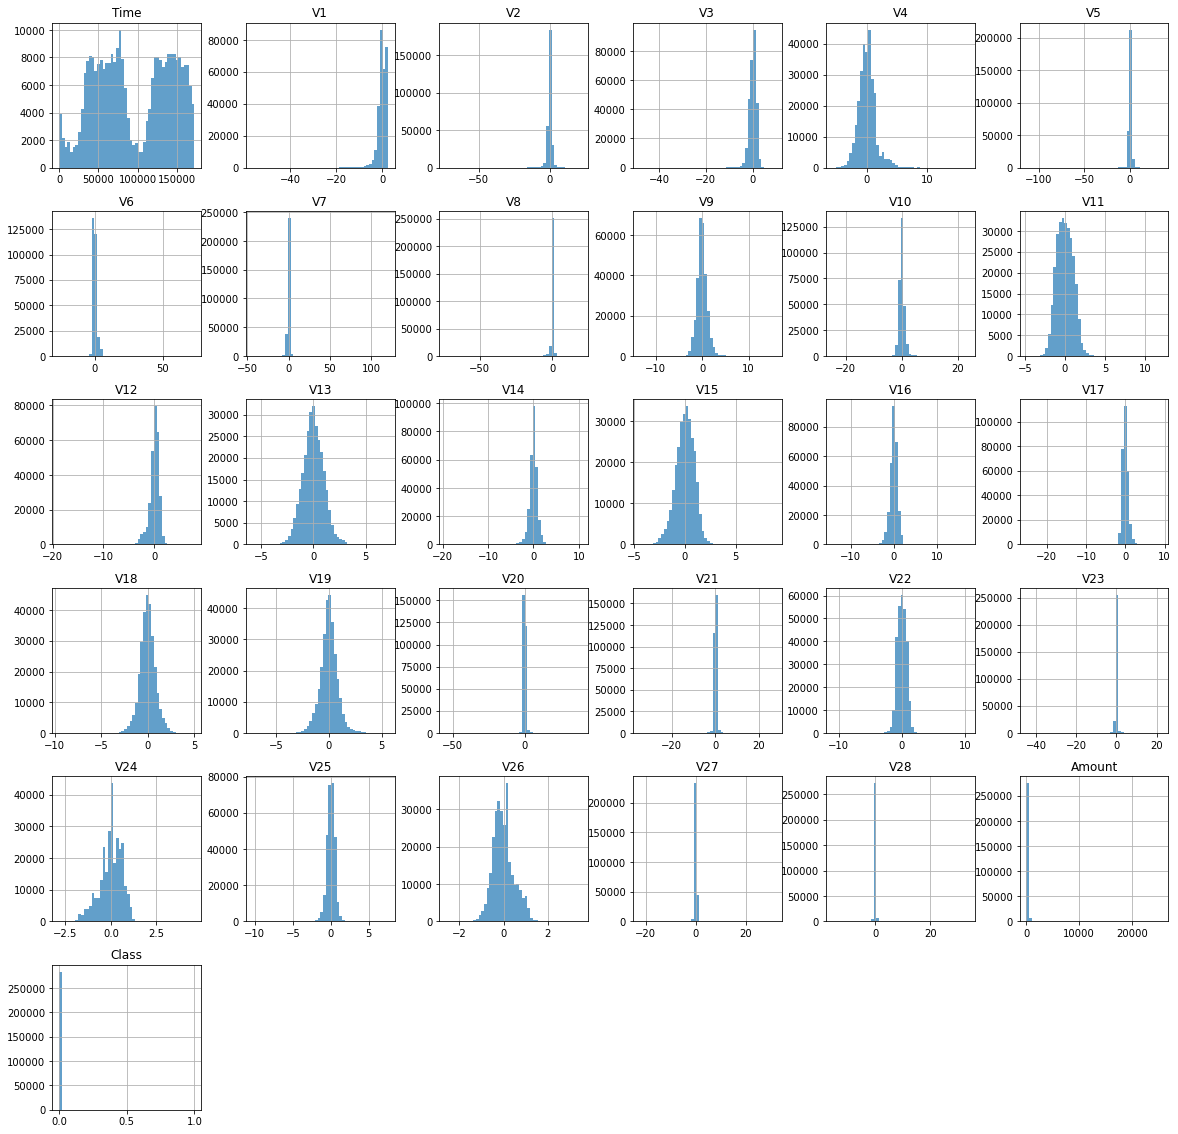

In [96]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot of histogram
# x: features values
# y: frequency 
df_modified.hist(figsize=(20,20), bins=50, alpha=0.7)
plt.show()

In [97]:
# Determine number of fraud cases in dataset

Fraud = df_modified[df_modified['Class'] == 1]
Valid = df_modified[df_modified['Class'] == 0]
outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))


0.0016698852262818046
Fraud Cases: 473
Valid Cases: 283253


#### Missing and Nan values

In [98]:
# Missing values
print(sum(df_modified.isnull().sum()))

# NaN values
print(sum(df_modified.isna().sum()))

0
0


#### Class balance visualization

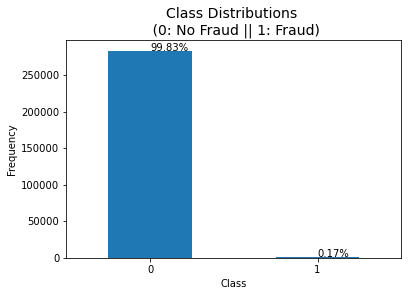

In [99]:
# Visualizing the class distribution with percentage on top of the bars

count_classes = pd.value_counts(df_modified['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.xticks(range(2))
plt.xlabel('Class')
plt.ylabel('Frequency')

for index, value in enumerate(count_classes):
    plt.text(index, value, str(round((value/len(df_modified['Class']))*100, 2))+'%')
plt.show()


#### Basic info of transactions

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64


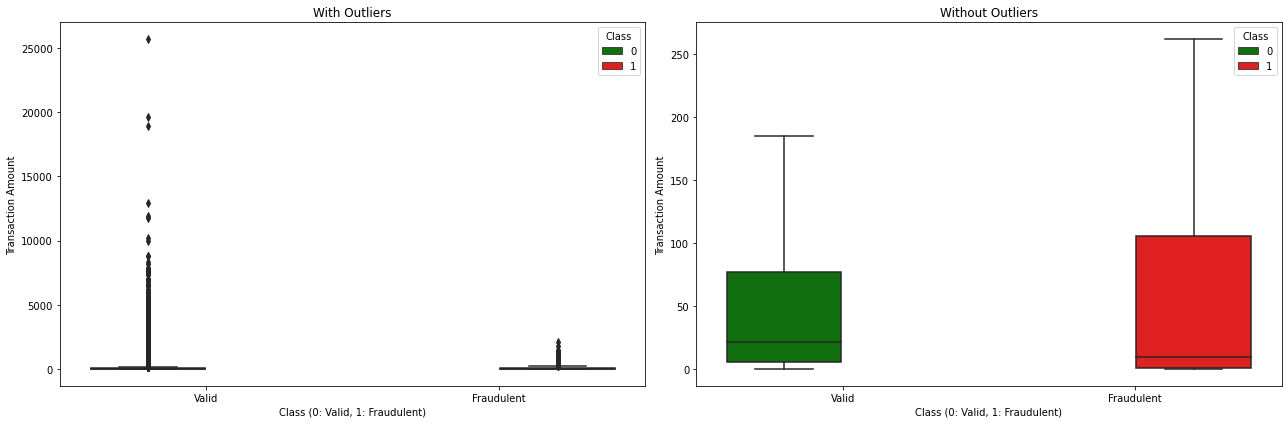

In [161]:
# mean amount of money per transaction by fraudulent transactions
print(Fraud.Amount.describe())
print(Valid.Amount.describe())

# Boxplot outliers and whiskers 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(ax=ax1, x="Class", y="Amount", hue="Class", data=df_modified, palette={1: 'red', 0: 'green'}, showfliers=True)
ax1.set_title('With Outliers')
ax1.set_xlabel('Class (0: Valid, 1: Fraudulent)')
ax1.set_ylabel('Transaction Amount')
ax1.set_xticklabels(['Valid', 'Fraudulent'])

sns.boxplot(ax=ax2, x="Class", y="Amount", hue="Class", data=df_modified, palette={1: 'red', 0: 'green'}, showfliers=False)
ax2.set_title('Without Outliers')
ax2.set_xlabel('Class (0: Valid, 1: Fraudulent)')
ax2.set_ylabel('Transaction Amount')
ax2.set_xticklabels(['Valid', 'Fraudulent'])

plt.tight_layout()
plt.show()




#### Correlation matrix - before sampling data

In [101]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Shuffle the data before creating the subsamples

df_modified = df_modified.sample(frac=1)

# Get the fraud transactions
_fraud_df = df_modified[df_modified['Class'] == 1]

# Get the number of fraud transactions
num_fraud = len(_fraud_df)
print(num_fraud)

# Extract an equal number of non-fraud transactions
_non_fraud_df = df_modified[df_modified['Class'] == 0].iloc[:num_fraud]

normal_distributed_df = pd.concat([_fraud_df, _non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

473


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10801,18399.0,-14.474437,6.503185,-17.712632,11.270352,-4.150142,-3.372098,-16.535807,-1.443947,-6.815273,...,-2.475962,0.342391,-3.564508,-0.818140,0.153408,0.755079,2.706566,-0.992916,1.00,1
241445,151029.0,-3.818214,2.551338,-4.759158,1.636967,-1.167900,-1.678413,-3.144732,1.245106,-1.692541,...,0.837685,0.761712,-0.417694,-0.469712,-0.225934,0.586415,-0.348107,0.087777,10.70,1
33688,37339.0,-0.760780,-3.461855,-1.257901,0.904568,-1.350295,-0.249022,1.387102,-0.309127,0.096138,...,0.565357,-0.727601,-1.052797,0.118082,0.126398,0.985244,-0.306863,0.160266,1059.95,0
156990,109298.0,-1.000611,3.346850,-5.534491,6.835802,-0.299803,0.095951,-2.440419,1.286301,-2.766438,...,0.439757,-0.694099,0.299660,-0.657601,0.101648,0.430457,0.824685,0.326952,186.13,1
149869,92092.0,-1.108478,3.448953,-6.216972,3.021052,-0.529901,-2.551375,-2.001743,1.092432,-0.836098,...,0.825951,1.144170,0.208559,-0.295497,-0.690232,-0.364749,0.229327,0.208830,18.00,1


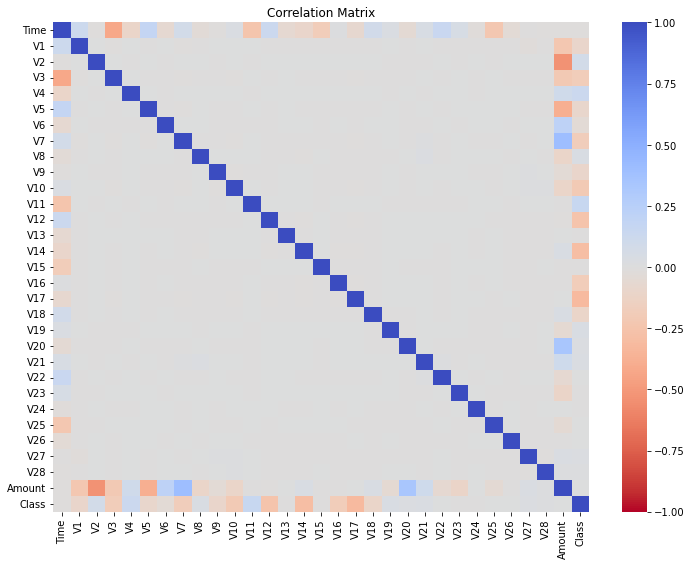

In [102]:
# Correlation Matrix
corrmat = df_modified.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, cmap='coolwarm_r', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()
# 

PCA (Principal Component Analysis) is a dimensionality reduction method that transforms features into orthogonal components. As a result, the transformed features (principal components) are uncorrelated with each other. Therefore, for the PCA-derived features (V1, V2, ... V28), a correlation matrix would show little to no correlation between them.
However, it's still valuable to check the correlation of non-PCA features (Time and Amount) with the target variable (Class). This can help determine if there's any relationship between these features and the probability of a transaction being fraudulent.

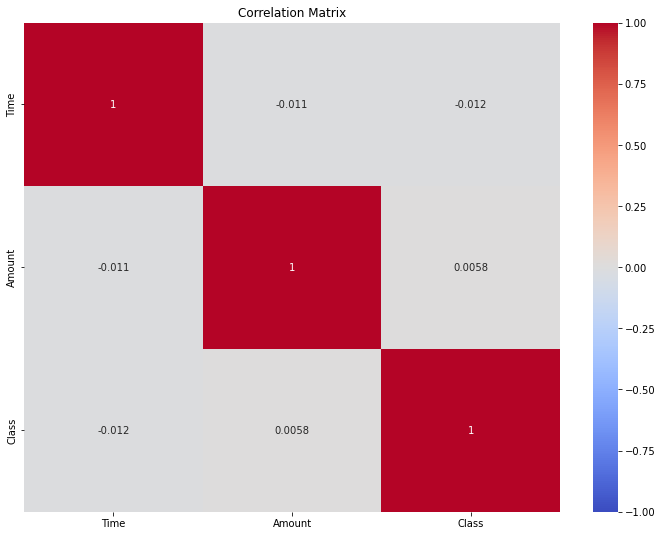

In [103]:
# Correlation Matrix between only Time, Amount and Class with values inside the graph
corrmat = df_modified[['Time', 'Amount', 'Class']].corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()



In [104]:
def plot_top_correlated_features(df, class_name, n_features=4):
    """
    Plot the top n features most correlated with the specified class.
    
    Parameters:
    - df: DataFrame with the data.
    - class_name: Name of the class to compute correlations.
    - n_features: Number of top features to plot (default is 4).
    """
    # Calculate correlation of each feature with the specified class
    feature_correlations = df.corr()[class_name].sort_values(ascending=False)

    # Selecting the top features excluding the specified class
    top_features = feature_correlations.iloc[1:n_features+1].index.tolist()

    # Extracting correlation values for these top features
    top_corr_values = feature_correlations[top_features]

    # Plotting the horizontal line graph
    plt.figure(figsize=(12, 7))
    top_corr_values.plot(kind='barh', color='skyblue')
    plt.title(f'Correlation of Top Features with {class_name}')
    plt.xlabel('Correlation Value')
    plt.ylabel('Feature')
    plt.gca().invert_yaxis()  # To display the highest correlated feature at the top
    plt.show()

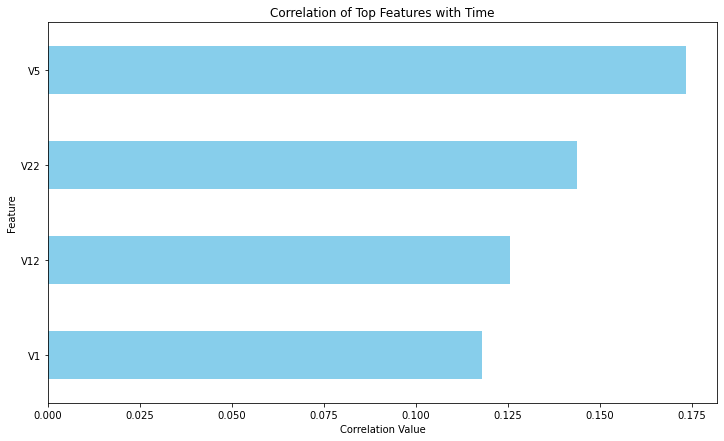

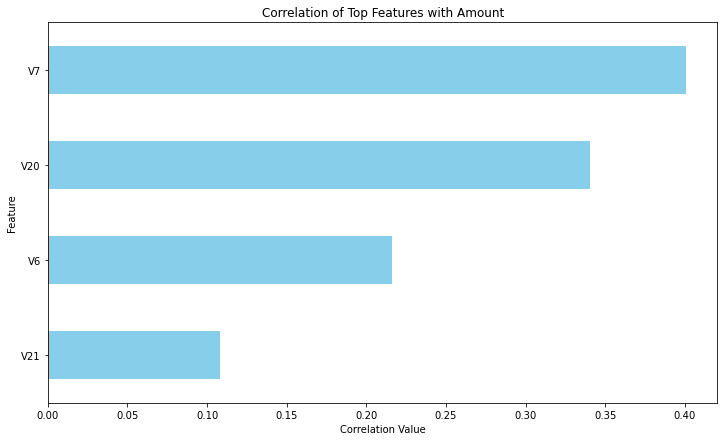

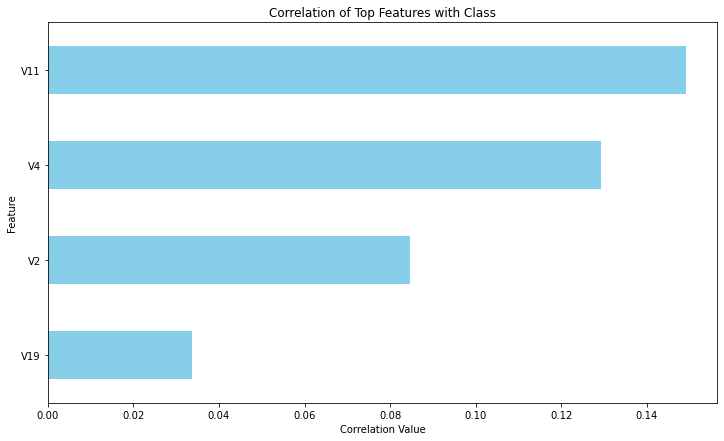

In [105]:
plot_top_correlated_features(df_modified, 'Time')
plot_top_correlated_features(df_modified, 'Amount')
plot_top_correlated_features(df_modified, 'Class')

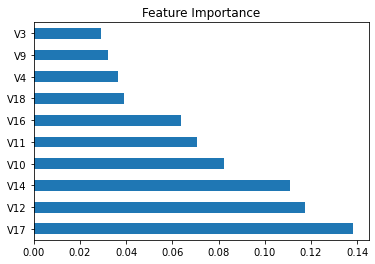

In [106]:
# Feature importance for class Time

from sklearn.ensemble import ExtraTreesClassifier

X = df_modified.iloc[:, :-1]
y = df_modified.iloc[:, -1]

model = ExtraTreesClassifier()
model.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()




#### Amounts over time distributions 

c:\Users\leo_b\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\leo_b\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\leo_b\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

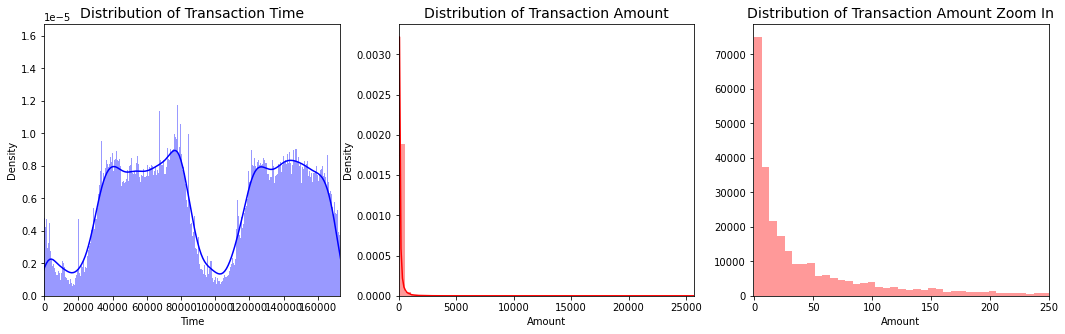

In [107]:
# Plotting the distribution of 'Time' and 'Amount'
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.distplot(df_modified['Time'], ax=ax[0], color='b', bins=600)   
ax[0].set_title('Distribution of Transaction Time', fontsize=14)
ax[0].set_xlim([min(df_modified['Time']), max(df_modified['Time'])])

sns.distplot(df_modified['Amount'], ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
ax[1].set_xlim([min(df_modified['Amount']), max(df_modified['Amount'])])

sns.distplot(df['Amount'], ax=ax[2], color='r', bins=4000,  kde=False)
ax[2].set_title('Distribution of Transaction Amount Zoom In', fontsize=14)
ax[2].set_xlim([-1, 250])

plt.show()

#### Transaction (fraud and not) over time 

In [151]:
import plotly.figure_factory as ff
from plotly.offline import iplot
import numpy as np


class_0 = df_modified.loc[df_modified['Class'] == 0]["Time"]
class_1 = df_modified.loc[df_modified['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'), yaxis=dict(title='Density'))
iplot(fig, filename='dist_only')

c:\Users\leo_b\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\leo_b\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



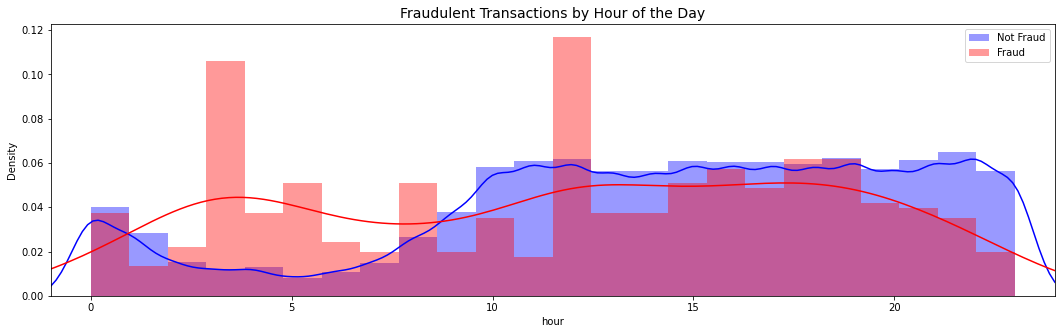

In [156]:
# Histogram based on the amount of money h by hour of the day
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

df_modified['hour'] = df_modified['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)
sns.distplot(df_modified[df_modified['Class'] == 0]['hour'], bins=24, color='b', ax=ax, label='Not Fraud')
sns.distplot(df_modified[df_modified['Class'] == 1]['hour'], bins=24, color='r', ax=ax, label='Fraud')
ax.legend()
ax.set_title('Fraudulent Transactions by Hour of the Day', fontsize=14)
ax.set_xlim([-1, 24])
plt.show()


#### Transactions overview

In [143]:
def bins_incrementation(bin_inc):
    # Define the bins in increments of x
    bins = list(range(0, int(df_modified['Amount'].max()) + bin_inc, bin_inc))

    # Create a 'binned_amount' column in df_modified
    df_modified['binned_amount'] = pd.cut(df_modified['Amount'], bins)

    # For fraud cases
    fraud_counts = df_modified[df_modified['Class'] == 1]['binned_amount'].value_counts().sort_values(ascending=False)
    for i in fraud_counts.index:
        fraud_counts[i] = fraud_counts[i]/sum(fraud_counts)*100
        
    # For non-fraud cases
    non_fraud_counts = df_modified[df_modified['Class'] == 0]['binned_amount'].value_counts().sort_values(ascending=False)
    for i in non_fraud_counts.index:
        non_fraud_counts[i] = non_fraud_counts[i]/sum(non_fraud_counts)*100

    return fraud_counts, non_fraud_counts

In [141]:
# Displaying the most common ranges in a plot
# do top 5



def top_amonts(df, _label):
    """Plot of top 5 percentage for amount transactions.

    Args:
        df_ (pd.DataFrame): percentage of rages
    """
    plt.figure(figsize=(12, 9))
    df.head(5).plot(kind='bar', figsize=(12, 9), color='g')
    # put pencentage on top of bars
    for index, value in enumerate(df.head(5)):
        plt.text(index, value + 0.5, str(round(value, 2))+'%')
    plt.xticks(rotation=90)
    plt.xlabel('Amount Range ($)')
    plt.ylabel('Percentage of Transactions')
    plt.title(f'Top 5 Frequency for {_label} Transactions')
    plt.show()


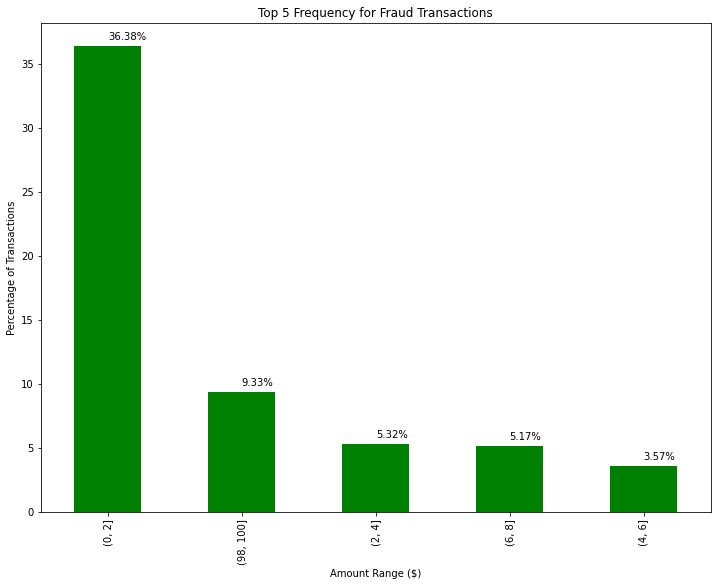

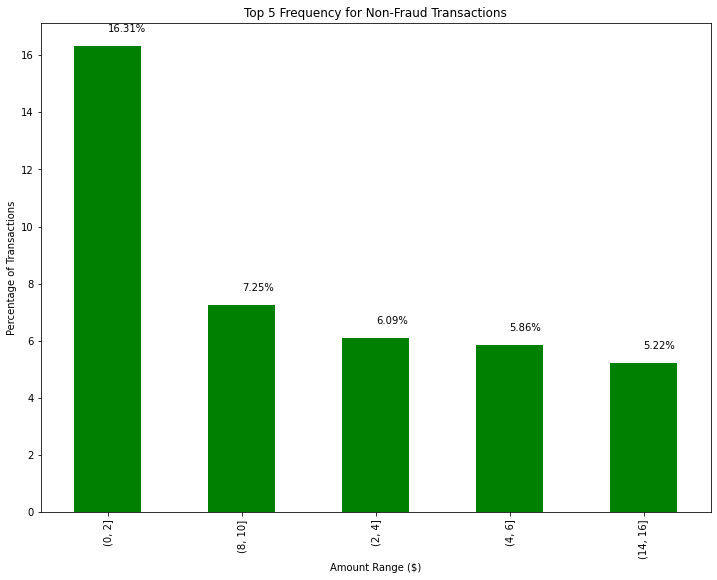

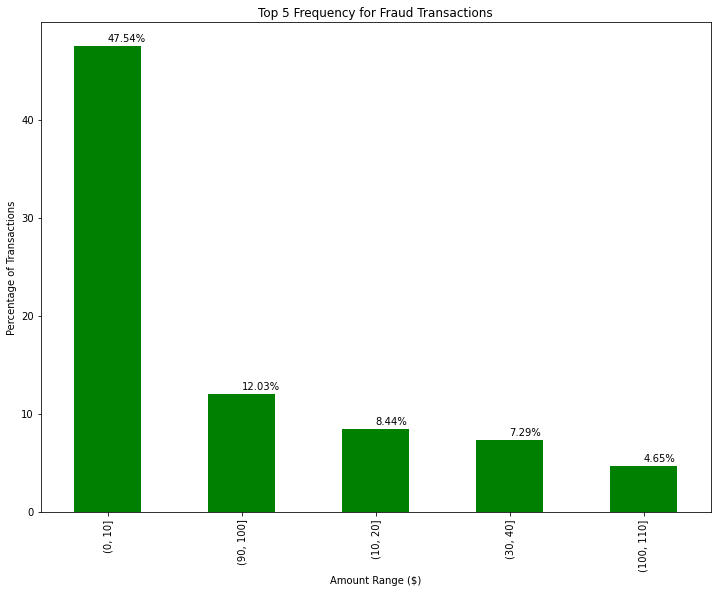

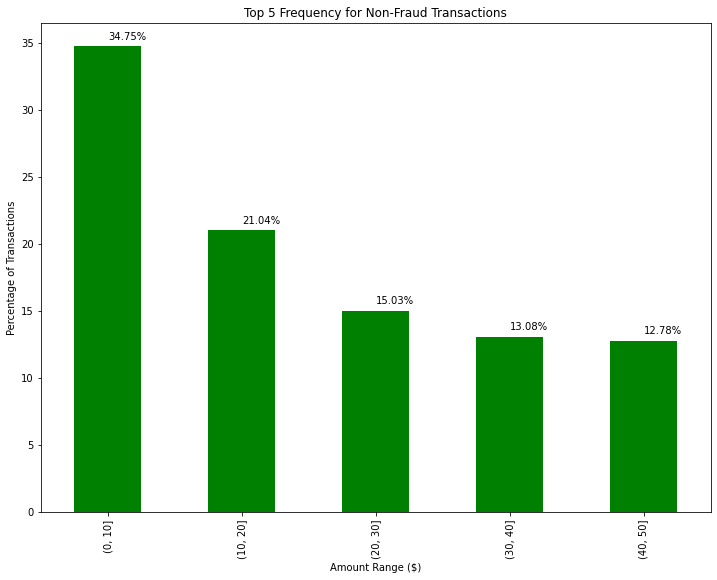

In [145]:
fraud_counts_2, non_fraud_counts_2 = bins_incrementation(2)
fraud_counts_10, non_fraud_counts_10 = bins_incrementation(10)

top_amonts(fraud_counts_2, 'Fraud')
top_amonts(non_fraud_counts_2, 'Non-Fraud')
top_amonts(fraud_counts_10, 'Fraud')
top_amonts(non_fraud_counts_10, 'Non-Fraud')

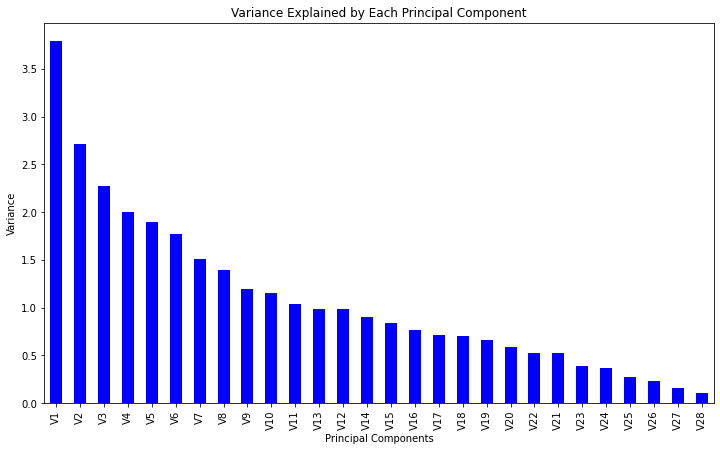

V1    3.794806
V2    2.711631
V3    2.276121
V4    1.999916
V5    1.896152
dtype: float64

In [163]:
#### Variation of the data

# Importing necessary libraries
import numpy as np

# Assuming the PCA-transformed features are named V1, V2, ... Vn
# Extracting only the PCA-transformed features
pca_columns = [col for col in df_modified.columns if 'V' in col]
pca_data = df_modified[pca_columns]

# Calculating the variance for each PCA feature
variances = pca_data.var()

# Sorting the variances in descending order to get top features
sorted_variances = variances.sort_values(ascending=False)

# Plotting the Scree plot
plt.figure(figsize=(12, 7))
sorted_variances.plot(kind='bar', color='blue')
plt.title('Variance Explained by Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Variance')
plt.show()

# Extracting top 5 features with the most variance
top_5_features = sorted_variances.head(5)
top_5_features


### Outliers

#### Interquartile Range Method

In [12]:
# Discover outliers in the dataset

# Interquartile Range Method
import numpy as np
from scipy import stats
df_outliers = df.copy()
for i in df_outliers.columns:
    if i != 'Class':
        df_outliers = df_outliers[np.abs(stats.zscore(df_outliers[i])) < 3]
print(df_outliers.shape)
print(df_outliers.head(5))


(207614, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   

        V26       V

#### Normalization of Time and Amount (REVIEW) USE ANOTHER METHOD

In [108]:
# Normalize the Time and Amount columns ONLY after removing the outliers
from sklearn.preprocessing import StandardScaler

def normalize_data(df): 
    df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
    df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))
    return df

In [ ]:
df_modified = normalize_data(df_modified)